## Team Members:
#### Jack McShane
#### Dinuka De Silva


# Data Import

In [ ]:
!pip install sklearn

In [ ]:
# The same line has been duplicated to avoid plots being duplicated
# https://github.com/statsmodels/statsmodels/issues/1265
%matplotlib
%matplotlib

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit

from IPython.display import HTML, display
import tabulate

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Using matplotlib backend: agg
Using matplotlib backend: agg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/hw2/message.csv')

# Question 1: Naive Bayes

# Part 1: Generate MxN binary matrix for unique words in the dataset

In [ ]:
# data exploration

In [ ]:
df.head()

Label                                            Message
0      0  go until jurong point  crazy   available only ...
1      0                      ok lar    joking wif u oni   
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0  u dun say so early hor    u c already then say   
4      0  nah i don t think he goes to usf  he lives aro...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.Label.value_counts()

0    4825
1     747
Name: Label, dtype: int64

In [ ]:
# split data into 10 folds

In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=.2, random_state=42)

In [ ]:
x = df.Message
y = np.array( df.Label )

In [ ]:
x_train_sets = list() # holds the 10 training sets of tweets
x_test_sets = list() # holds the 10 testing sets of tweets 
y_train_sets = list() # holds the 10 training label splits
y_test_sets = list() # holds the 10 testing label splits

In [ ]:
# inspiration for this code can be found at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
for train_index, test_index in sss.split(x, y):
  x_train_sets.append( x[train_index] )
  x_test_sets.append(  x[test_index] )
  y_train_sets.append( y[train_index] )
  y_test_sets.append( y[test_index] )

In [ ]:
# verifying that split worked correctly
pd.DataFrame(x_train_sets[0]).head()

Message
184                            he will  you guys close 
2171  can i please come up now imin town dontmatter ...
5422            ok k  sry i knw 2 siva  tats y i askd  
4113                          i ll see  but prolly yeah
4588  i ll see if i can swing by in a bit  got some ...

In [ ]:
# validating that proportions are correct
for df_train, df_test in zip(x_train_sets, x_test_sets):
  train_prop = df_train.shape[0] / ( df_train.shape[0] + df_test.shape[0] )
  test_prop = df_test.shape[0] / ( df_train.shape[0] + df_test.shape[0] )
  print('prop ->', train_prop, ':', test_prop)

prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015
prop -> 0.7998923187365399 : 0.20010768126346015


In [ ]:
# generating the dataframe representations

In [ ]:
# inputs:
# - df: a dataframe of tweets
# returns:
# - an mxn matrix which holds the counts of each unique word in each tweet
def gen_matrix(df):
  unique_words = set()
  for row in df.itertuples():
    unique_words = set.union( unique_words, row.Message.split() )

  wc_df = pd.DataFrame(0, index=df.index, columns=unique_words)

  for index, row in df.iterrows():
    for word in row.Message.split():
        wc_df.at[index, word] += 1

  return wc_df

In [ ]:
# wc_dfs is a 10 element list wherein each element is an 2D matrix containing containing the word counts of each individual word from its respective dataset
wc_dfs = [gen_matrix( pd.DataFrame(train_set) ) for train_set in x_train_sets]

In [ ]:
# check number of unique words per split
print( [len(df.columns) for df in wc_dfs] )

[7708, 7728, 7848, 7800, 7813, 7785, 7745, 7749, 7779, 7825]


In [ ]:
wc_dfs[0].head()

0089  detailed  justfound  woo  ...  gibe  accessible  gifted  clarification
184      0         0          0    0  ...     0           0       0              0
2171     0         0          0    0  ...     0           0       0              0
5422     0         0          0    0  ...     0           0       0              0
4113     0         0          0    0  ...     0           0       0              0
4588     0         0          0    0  ...     0           0       0              0

[5 rows x 7708 columns]

In [ ]:
wc_dfs[1].head()

pros  justfound  detailed  hills  ...  gibe  300603  gifted  clarification
3535     0          0         0      0  ...     0       0       0              0
3026     0          0         0      0  ...     0       0       0              0
1592     0          0         0      0  ...     0       0       0              0
1947     0          0         0      0  ...     0       0       0              0
4189     0          0         0      0  ...     0       0       0              0

[5 rows x 7728 columns]

In [ ]:
wc_dfs[2].head()

woo  detailed  0089  justfound  ...  gibe  accessible  gifted  clarification
2528    0         0     0          0  ...     0           0       0              0
635     0         0     0          0  ...     0           0       0              0
699     0         0     0          0  ...     0           0       0              0
5484    0         0     0          0  ...     0           0       0              0
4156    0         0     0          0  ...     0           0       0              0

[5 rows x 7848 columns]

In [ ]:
wc_dfs[3].head()

pros  justfound  woo  0089  ...  dload  300603  gifted  clarification
1011     0          0    0     0  ...      0       0       0              0
3634     0          0    0     0  ...      0       0       0              0
1222     0          0    0     0  ...      0       0       0              0
3076     0          0    0     0  ...      0       0       0              0
300      0          0    0     0  ...      0       0       0              0

[5 rows x 7800 columns]

In [ ]:
wc_dfs[4].head()

pros  justfound  woo  detailed  ...  300603  gibe  gifted  clarification
752      0          0    0         0  ...       0     0       0              0
4008     0          0    0         0  ...       0     0       0              0
5511     0          0    0         0  ...       0     0       0              0
4682     0          0    0         0  ...       0     0       0              0
3343     0          0    0         0  ...       0     0       0              0

[5 rows x 7813 columns]

In [ ]:
wc_dfs[5].head()

pros  woo  0089  hills  ...  300603  gibe  gifted  clarification
2710     0    0     0      0  ...       0     0       0              0
5126     0    0     0      0  ...       0     0       0              0
567      0    0     0      0  ...       0     0       0              0
4035     0    0     0      0  ...       0     0       0              0
1541     0    0     0      0  ...       0     0       0              0

[5 rows x 7785 columns]

In [ ]:
wc_dfs[6].head()

pros  justfound  detailed  0089  ...  accessible  gibe  300603  gifted
801      0          0         0     0  ...           0     0       0       0
2201     0          0         0     0  ...           0     0       0       0
1844     0          0         0     0  ...           0     0       0       0
595      0          0         0     0  ...           0     0       0       0
286      0          0         0     0  ...           0     0       0       0

[5 rows x 7745 columns]

In [ ]:
wc_dfs[7].head()

0089  detailed  hills  woo  ...  300603  accessible  gifted  clarification
3624     0         0      0    0  ...       0           0       0              0
2582     0         0      0    0  ...       0           0       0              0
5145     0         0      0    0  ...       0           0       0              0
1567     0         0      0    0  ...       0           0       0              0
4673     0         0      0    0  ...       0           0       0              0

[5 rows x 7749 columns]

In [ ]:
wc_dfs[8].head()

0089  woo  justfound  hills  ...  dload  300603  gifted  clarification
4488     0    0          0      0  ...      0       0       0              0
1448     0    0          0      0  ...      0       0       0              0
4095     0    0          0      0  ...      0       0       0              0
1560     0    0          0      0  ...      0       0       0              0
238      0    0          0      0  ...      0       0       0              0

[5 rows x 7779 columns]

In [ ]:
wc_dfs[9].head()

0089  detailed  hills  88222  ...  dload  accessible  gifted  clarification
1751     0         0      0      0  ...      0           0       0              0
1258     0         0      0      0  ...      0           0       0              0
5447     0         0      0      0  ...      0           0       0              0
1677     0         0      0      0  ...      0           0       0              0
4020     0         0      0      0  ...      0           0       0              0

[5 rows x 7825 columns]

# Part 2: Calculate the class and conditional probabilities

In [ ]:
# calculating priors
# each vector in y_train_sets is a binary representation of the classifications, so
# the sum of values over the number of values gives the prior prob of spam for the given set
spam_priors = [ (sum(train_set) / len(train_set)) for train_set in y_train_sets ]
print(*spam_priors)

0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366 0.13417096701817366


In [ ]:
# calculating conditional probs

In [ ]:
# df must be representational of only one class
# ie. all tweets are spam or ham, not a mixture
def get_cond(df_class):
  nump = df_class.to_numpy()
  n = nump.sum(axis=0)
  d = nump.sum()
  return dict( zip(df_class.columns, (n/d)) )

In [ ]:
# inputs:
# - x: tweets as a pandas dataframe
# - y: the associated binary classifications as numpy array
# returns:
# - a tuple
# -- first elem: a dict obj containing the conditional probs of each word for ham
# -- second elem: a dict obj containing the conditional probs of each word for spam
def get_conds(x: pd.DataFrame, y: np.array):
  concat = x.copy()
  concat.insert(0, 'Label', y)
  return (get_cond(concat[concat.Label == 0].drop(columns='Label') ), get_cond( concat[concat.Label == 1].drop(columns='Label') ))

In [ ]:
# structure of conds var
# conds is a list of 10 elements
# each element is a tuple returned from the get_conds() function call
# ie. two dictionaries containing ham and spam conditional probs respectively
conds = [get_conds(x_train, y_train) for x_train, y_train in zip(wc_dfs, y_train_sets)]

In [ ]:
# visualizing ham conditionals
for tup in conds:
  print(tup[0].values())

dict_values([0.0, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 0.0, 0.0, 0.00012402111902483966, 1.7717302717834235e-05, 1.7717302717834235e-05, 0.00023032493533184508, 8.858651358917119e-05, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 8.858651358917119e-05, 3.543460543566847e-05, 1.7717302717834235e-05, 3.543460543566847e-05, 1.7717302717834235e-05, 0.00014173842174267388, 5.315190815350271e-05, 3.543460543566847e-05, 3.543460543566847e-05, 0.0008504305304560433, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 5.315190815350271e-05, 0.0, 1.7717302717834235e-05, 3.543460543566847e-05, 0.0007086921087133695, 5.315190815350271e-05, 1.7717302717834235e-05, 5.315190815350271e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 8.858651358917119e-05, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 1.7717

In [ ]:
# visualizing spam conditionals
for tup in conds:
  print(tup[0].values())

dict_values([0.0, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 0.0, 0.0, 0.00012402111902483966, 1.7717302717834235e-05, 1.7717302717834235e-05, 0.00023032493533184508, 8.858651358917119e-05, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 8.858651358917119e-05, 3.543460543566847e-05, 1.7717302717834235e-05, 3.543460543566847e-05, 1.7717302717834235e-05, 0.00014173842174267388, 5.315190815350271e-05, 3.543460543566847e-05, 3.543460543566847e-05, 0.0008504305304560433, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 5.315190815350271e-05, 0.0, 1.7717302717834235e-05, 3.543460543566847e-05, 0.0007086921087133695, 5.315190815350271e-05, 1.7717302717834235e-05, 5.315190815350271e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 1.7717302717834235e-05, 8.858651358917119e-05, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 0.0, 1.7717302717834235e-05, 1.7717

# Part 3: Perform NB classification for the test set and calculate evaluation parameters

In [ ]:
# inputs:
# - tweet: a string representation of a given tweet
# - prior: the prior prob of the tweet being a particular class
# - conds: conditional probs of words for the aforementioned class
def logprob(tweet: str, prior, conds):
  logprob = np.log( prior )
  for word in tweet.split():
    if word in conds.keys():
      if conds[word] != 0:
        logprob += np.log( conds[word] )
  return logprob

In [ ]:
# inputs:
# - tweet: a tweet given as a string
# - ham_prior: prior prob of ham for a dataset
# - ham_conds: dictionary containing conditional probs of ham message for each word
# - spam_conds: dictionary containing conditional probs of spam message for each word
# outputs:
# - a binary classification for the given tweet (ie. 0 or 1) wherein 1 is a spam classification
# 
def classify(tweet, ham_prior, ham_conds, spam_conds):
  ham_prob = logprob(tweet, ham_prior, ham_conds)
  spam_prob = logprob(tweet, 1-ham_prior, spam_conds)
  if spam_prob > ham_prob:
    return 1
  return 0

In [ ]:
# gen array of predictions for each dataset
# i is used to iterate through each set of {priors, conditionals, and x test sets}
# resulting in a 2D array where each inner 1D array contains the classifications for the tweets in a given test set
y_pred = [[classify(tweet, 1-spam_priors[i], conds[i][0], conds[i][1]) for tweet in x_test_sets[i]] for i in range(len(x_test_sets)) ]

In [ ]:
# visualizing y_pred
for i, pred in enumerate(y_pred):
  print(f'prediction set {i}: ')
  print(*pred)

prediction set 0: 
1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1

In [ ]:
# inputs:
# - ylabels: the true classifications for a given test set
# - y_pred: the predicted values for the same test set as generated by the NB classification
# returns:
# - a 2x2 numpy array representing the corresponding confusion matrix
def gen_confusion_mat(y_labels, y_pred):
  tpos, tneg, fpos, fneg = 0, 0, 0, 0
  for i in range(len(y_labels)):
    if y_labels[i] == 1 and y_pred[i] == 1:
      tpos += 1
    if y_labels[i] == 0 and y_pred[i] == 0:
      tneg += 1
    if y_labels[i] == 1 and y_pred[i] == 0:
      fneg += 1
    if y_labels[i] == 0 and y_pred[i] == 1:
      fpos += 1

  return np.array([[tneg, fpos],[fneg, tpos]])

In [ ]:
def calcAccuracy(mat):
  return (mat[1][1] + mat[0][0]) / mat.sum().sum()

In [ ]:
def calcPrecision(mat):
  return mat[1][1] / (mat[0][1] + mat[1][1])

In [ ]:
def calcRecall(mat):
  return mat[1][1] / (mat[1][1] + mat[1][0])

In [ ]:
def calcSpecificity(mat):
  return mat[0][0] / (mat[0][0] + mat[0][1])

In [ ]:
def get_stats(mat):
  return calcAccuracy(mat), calcPrecision(mat), calcRecall(mat), calcSpecificity(mat)

In [ ]:
# a 10 elem list where each elem is the confusion matrix for a given test set
cmats = [ gen_confusion_mat(y_labels, y_preds) for y_labels, y_preds in zip(y_test_sets, y_pred) ]

In [ ]:
# a 10 elem list wherein each elem is a 4-elem tuple containing accuracy, precision, recall, and specificity in that order
stats = [get_stats(mat) for mat in cmats]

In [ ]:
# visualize confusion matrices and corresponding stats
for i, mat in enumerate(cmats):
  print(f'confusion matrix {i}:')
  print(mat)
  print('accuracy: ', stats[i][0])
  print('precision: ', stats[i][1])
  print('recall: ', stats[i][2])
  print('specificity: ', stats[i][3])
  print()

confusion matrix 0:
[[212 754]
 [117  32]]
accuracy:  0.21883408071748878
precision:  0.04071246819338423
recall:  0.21476510067114093
specificity:  0.2194616977225673

confusion matrix 1:
[[167 799]
 [112  37]]
accuracy:  0.18295964125560538
precision:  0.04425837320574163
recall:  0.2483221476510067
specificity:  0.17287784679089027

confusion matrix 2:
[[188 778]
 [114  35]]
accuracy:  0.2
precision:  0.04305043050430504
recall:  0.2348993288590604
specificity:  0.19461697722567287

confusion matrix 3:
[[201 765]
 [116  33]]
accuracy:  0.20986547085201793
precision:  0.041353383458646614
recall:  0.2214765100671141
specificity:  0.2080745341614907

confusion matrix 4:
[[203 763]
 [117  32]]
accuracy:  0.21076233183856502
precision:  0.04025157232704402
recall:  0.21476510067114093
specificity:  0.21014492753623187

confusion matrix 5:
[[193 773]
 [110  39]]
accuracy:  0.20807174887892377
precision:  0.0480295566502463
recall:  0.26174496644295303
specificity:  0.1997929606625259

co

In [ ]:
# generating and visualizing the average among the folds for each stat
npstats = np.array(stats)
avgs = [ val / npstats.shape[0] for val in npstats.sum(axis=0)]
print('Average accuracy: ', avgs[0])
print('Average precision: ', avgs[1])
print('Average recall: ', avgs[2])
print('Average specificity: ', avgs[3])

Average accuracy:  0.20609865470852018
Average precision:  0.04412403577804987
Average recall:  0.23959731543624163
Average specificity:  0.20093167701863351


# Part 4: Discuss results

The results for NB on this initial classification are rather poor.  As you can see the average accuracy across the folds is ~20%, which I would not generally consider good performance.  This of course, is due to the fact that words that if a word does not occur in the training set for a particular class, its conditional probability is zero and our method for handling that is to skip over it.  In terms of the mathematical consequences, that is the same as saying that it is always present which is the exact opposite of the case.  The better way to handle such a case of non-appearance is to substitute that zero-valued conditional with an extremely low probability to better capture the reality of the situation. This is something that is demonstrated later in the section below.





The most worrying statistic out of the four is the precision from the folds.  It is extremely low, ~4.5%, indicating that the classifier is classifying non-spam emails as spam at far too high a rate.

From what I know of Naive Bayes, it is often far more accurate than you would imagine given the conditional independence assumption. That has not been the case here, but I think we will find that that will change in the next section.

# Part 5: Laplace Smoothing + Discussion

In [ ]:
# inputs: 
# - df: dataframe for a given class (ie. either ham or spam)
# returns:
# - a dictionary containing the conditional probabilities of each feature from the dataframe
def conds_laplace(df):
  nump = df.to_numpy()
  n = nump.sum(axis=0) + 1
  d = nump.sum() + len(df.columns)
  return dict( zip(df.columns, (n/d)) )

In [ ]:
# inputs:
# - x: tweets as a pandas dataframe
# - y: the associated binary classifications as numpy array
# returns:
# - a tuple of conditional probabilities where laplacian smoothing has been applied
# -- first elem: a dict obj containing the conditional probs of each word for ham
# -- second elem: a dict obj containing the conditional probs of each word for spam
def get_conds_lap(x: pd.DataFrame, y: np.array):
  concat = x.copy()
  concat.insert(0, 'Label', y)
  return (conds_laplace(concat[concat.Label == 0].drop(columns='Label') ), conds_laplace( concat[concat.Label == 1].drop(columns='Label') ))

In [ ]:
# structure of lap_conds var --> identical to conds var above
# lap_conds is a list of 10 elements
# each element is a tuple returned from the conds_lap() function call
# ie. two dictionaries containing ham and spam conditional probs with laplacian smoothing applied respectively
lap_conds = [get_conds_lap(x_train, y_train) for x_train, y_train in zip(wc_dfs, y_train_sets)]

In [ ]:
# visualizing ham conditionals
for i, tup in enumerate(lap_conds):
  print(f'fold {i}:')
  print(tup[0].values())

fold 0:
dict_values([1.558846453624318e-05, 3.117692907248636e-05, 3.117692907248636e-05, 3.117692907248636e-05, 1.558846453624318e-05, 1.558846453624318e-05, 0.00012470771628994543, 3.117692907248636e-05, 3.117692907248636e-05, 0.00021823850350740452, 9.353078721745907e-05, 3.117692907248636e-05, 1.558846453624318e-05, 3.117692907248636e-05, 3.117692907248636e-05, 3.117692907248636e-05, 9.353078721745907e-05, 4.676539360872954e-05, 3.117692907248636e-05, 4.676539360872954e-05, 3.117692907248636e-05, 0.00014029618082618862, 6.235385814497272e-05, 4.676539360872954e-05, 4.676539360872954e-05, 0.0007638347622759158, 3.117692907248636e-05, 3.117692907248636e-05, 3.117692907248636e-05, 6.235385814497272e-05, 1.558846453624318e-05, 3.117692907248636e-05, 4.676539360872954e-05, 0.0006391270459859704, 6.235385814497272e-05, 3.117692907248636e-05, 6.235385814497272e-05, 3.117692907248636e-05, 3.117692907248636e-05, 3.117692907248636e-05, 3.117692907248636e-05, 9.353078721745907e-05, 3.11769290

In [ ]:
# visualizing spam conditionals
for i, tup in enumerate(lap_conds):
  print(f'fold {i}:')
  print(tup[1].values())

fold 0:
dict_values([8.699434536755111e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 8.699434536755111e-05, 8.699434536755111e-05, 0.00078294910830796, 4.349717268377556e-05, 8.699434536755111e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 8.699434536755111e-05, 4.349717268377556e-05, 0.0006089604175728578, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 0.00039147455415398, 4.349717268377556e-05, 0.0002609830361026533, 8.699434536755111e-05, 4.349717268377556e-05, 4.349717268377556e-05, 8.699434536755111e-05, 0.00013049151805132666, 4.349717268377556e-05, 4.349717268377556e-05, 8.699434536755111e-05, 4.349717268377556e-05, 0.00013049151805132666, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.349717268377556e-05, 4.3497172683775

In [ ]:
# gen array of predictions for each dataset
# i is used to iterate through each set of {priors, conditionals, and x test sets}
# resulting in a 2D array where each inner 1D array contains the classifications for the tweets in a given test set
y_lap_preds = [[classify(tweet, 1-spam_priors[i], lap_conds[i][0], lap_conds[i][1]) for tweet in x_test_sets[i]] for i in range(len(x_test_sets)) ]

In [ ]:
# visualizing y_lap_preds
for i, pred in enumerate(y_lap_preds):
  print(f'prediction set {i}: ')
  print(*pred)

prediction set 0: 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [ ]:
# a 10 elem list where each elem is the confusion matrix for a given test set
lap_cmats = [ gen_confusion_mat(y_labels, y_pred) for y_labels, y_pred in zip(y_test_sets, y_lap_preds) ]

In [ ]:
# a 10 elem list wherein each elem is a 4-elem tuple containing accuracy, precision, recall, and specificity for the laplacian estimations in that order
lap_stats = [get_stats(mat) for mat in lap_cmats]

In [ ]:
# visualize confusion matrices and corresponding stats
for i, mat in enumerate(lap_cmats):
  print(f'confusion matrix {i}:')
  print(mat)
  print('accuracy: ', lap_stats[i][0])
  print('precision: ', lap_stats[i][1])
  print('recall: ', lap_stats[i][2])
  print('specificity: ', lap_stats[i][3])
  print()

confusion matrix 0:
[[964   2]
 [ 13 136]]
accuracy:  0.9865470852017937
precision:  0.9855072463768116
recall:  0.912751677852349
specificity:  0.9979296066252588

confusion matrix 1:
[[965   1]
 [ 11 138]]
accuracy:  0.989237668161435
precision:  0.9928057553956835
recall:  0.9261744966442953
specificity:  0.9989648033126294

confusion matrix 2:
[[963   3]
 [ 12 137]]
accuracy:  0.9865470852017937
precision:  0.9785714285714285
recall:  0.9194630872483222
specificity:  0.9968944099378882

confusion matrix 3:
[[961   5]
 [ 13 136]]
accuracy:  0.9838565022421525
precision:  0.9645390070921985
recall:  0.912751677852349
specificity:  0.994824016563147

confusion matrix 4:
[[962   4]
 [  8 141]]
accuracy:  0.989237668161435
precision:  0.9724137931034482
recall:  0.9463087248322147
specificity:  0.9958592132505176

confusion matrix 5:
[[961   5]
 [ 16 133]]
accuracy:  0.9811659192825112
precision:  0.9637681159420289
recall:  0.8926174496644296
specificity:  0.994824016563147

confusion 

In [ ]:
# generating and visualizing the average among the folds for each stat
nplap_stats = np.array(lap_stats)
lap_avgs = [ val / nplap_stats.shape[0] for val in nplap_stats.sum(axis=0)]
print('Average Laplacian accuracy: ', lap_avgs[0])
print('Average Laplacian precision: ', lap_avgs[1])
print('Average Laplacian recall: ', lap_avgs[2])
print('Average Laplacian specificity: ', lap_avgs[3])

Average Laplacian accuracy:  0.9866367713004486
Average Laplacian precision:  0.9758289232870027
Average Laplacian recall:  0.9228187919463087
Average Laplacian specificity:  0.99648033126294


# Discussion of Laplace Smoothing results
As suggested in the discussion above, the use of Laplace smoothing has made an extremely substantial difference in the classifier's ability to perform.  The replacement of 1 for the conditional probability value of words that actually have a probability near zero has alleviated the problem of poor representation in the original classifier, and we are now seeing an average accuracy of ~98%!

The discrepency in the precision of the classifier seems to be righted and the classifier seems to be performing well in all metrics.  The one that does give some pause is the recall metric.  There is a slight discrepency there when compared to the other metrics.  This seems to point to the classifier having some trouble detecting a spam tweet when it sees it.

Given accurate representation of the conditional probabilities, the classifier does extremely well in its classification. While you could always ask for better performance for larger scale applications, NB is certainly worth considering.  For example, if you would get 1000 emails/yr, NB would only miss ~20 classifications per year. I can't say that I would be unhappy with that.

# Question 2


In [ ]:
import random

patient_satisfaction_data = np.zeros(shape=(0, 4))
patient_satisfaction_data_with_duplicates_and_noise = np.zeros(shape=(0, 4))


with open('drive/MyDrive/hw2/patient_satisfaction.txt', 'r') as file:
  for line in file:
    [y, x1, x2, x3] = line.split()
    y = float(y)
    x1 = float(x1)
    x2 = float(x2)
    x3 = float(x3)

    data_row = [[y, x1, x2, x3]]
    patient_satisfaction_data = np.append(patient_satisfaction_data, data_row, axis=0)
    patient_satisfaction_data_with_duplicates_and_noise = np.append(patient_satisfaction_data_with_duplicates_and_noise, data_row, axis=0)

    for i in range(1000):
      data_row_with_duplicates_and_noise = [[y + random.uniform(0.0, 1.0), x1 + random.uniform(0.0, 1.0), x2 + random.uniform(0.0, 1.0), x3 + random.uniform(0.0, 1.0)]] 
      patient_satisfaction_data_with_duplicates_and_noise = np.append(patient_satisfaction_data_with_duplicates_and_noise, data_row_with_duplicates_and_noise, axis=0)

patient_satisfaction_data_with_duplicates_and_noise.shape

(46046, 4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 5)
fig.suptitle('Scatter plots between each of the features and label')

ax1.scatter(patient_satisfaction_data[:,1],patient_satisfaction_data[:,0]) 
ax1.set_xlabel("x1")
ax1.set_ylabel("y")

ax2.scatter(patient_satisfaction_data[:,2],patient_satisfaction_data[:,0]) 
ax2.set_xlabel("x2")
ax2.set_ylabel("y")

ax3.scatter(patient_satisfaction_data[:,3],patient_satisfaction_data[:,0]) 
ax3.set_xlabel("x3")
ax3.set_ylabel("y")
plt.show()

patient_satisfaction_data_corr = np.corrcoef(patient_satisfaction_data,rowvar=False)
patient_satisfaction_data_corr_df = pd.DataFrame(data=patient_satisfaction_data_corr, columns=["y", "x1", "x2", "x3"], index=["y", "x1", "x2", "x3"])

display(HTML(tabulate.tabulate(patient_satisfaction_data_corr_df, tablefmt='html', headers="keys")))
# print(tabulate.tabulate(patient_satisfaction_data_corr_df, headers="keys"))
print("""
The three features x1, x2 and x3 and negatively correlated with y. Which means
1. Elderly used to be less satisfied with the hospital.
2. Seviority of illnesses has sometime led to low satisfaction.
3. The anxiety level of the patients also seems to have made the patients less satisfied some times. 
""")


The three features x1, x2 and x3 and negatively correlated with y. Which means
1. Elderly used to be less satisfied with the hospital.
2. Seviority of illnesses has sometime led to low satisfaction.
3. The anxiety level of the patients also seems to have made the patients less satisfied some times. 



In [ ]:
from sklearn.metrics import mean_squared_error
import random
import time

def rmse(y, y_hat):
  return np.sqrt(np.power(y - y_hat, 2).sum()/ len(y))

def batch_gradient_descent(X_train, Y_train, X_test, Y_test, eta, number_of_iterations):
  N = len(Y_train)

  theta = np.zeros((X_train.shape[1], 1))

  rmse_training = []
  rmse_test = []
  loss = []
  execution_time = []

  for iteration in range(number_of_iterations):

    start = time.time()

    y_hat = X_train.dot(theta)

    gradiants = 2/ N * X_train.T.dot(y_hat - Y_train)
    theta = theta - eta * gradiants

    end = time.time()
    execution_time.append(end - start)

    loss.append(mean_squared_error(y_hat, Y_train))
    rmse_training.append(rmse(Y_train, X_train.dot(theta)))
    rmse_test.append(rmse(Y_test, X_test.dot(theta)))
  
  return theta, loss, execution_time, rmse_training, rmse_test

def stochastic_gradient_descent(X_train, Y_train, X_test, Y_test, eta, number_of_iterations):
  N = len(Y_train)

  theta = np.zeros((X_train.shape[1], 1))

  rmse_training = []
  rmse_test = []
  loss = []
  execution_time = []

  for iteration in range(number_of_iterations):

    start = time.time()

    random_sample_indexs = [random.randint(0, N-1)]
    X_rand = X_train[random_sample_indexs]
    Y_rand = Y_train[random_sample_indexs]
    y_hat_rand = X_rand.dot(theta)

    gradiants = 2/ N * X_rand.T.dot(y_hat_rand - Y_rand)
    theta = theta - eta * gradiants
    
    end = time.time()
    execution_time.append(end - start)

    loss.append(mean_squared_error(y_hat_rand, Y_rand))
    rmse_training.append(rmse(Y_train, X_train.dot(theta)))
    rmse_test.append(rmse(Y_test, X_test.dot(theta)))
  
  return theta, loss, execution_time, rmse_training, rmse_test

def mini_batch_gradient_descent(X_train, Y_train, X_test, Y_test, eta, number_of_iterations, batch_size):
  N = len(Y_train)

  theta = np.zeros((X_train.shape[1], 1))

  rmse_training = []
  rmse_test = []
  loss = []
  execution_time = []

  for iteration in range(number_of_iterations):

    start = time.time()

    random_sample_indexs = [random.randint(0, N-1) for i in range(batch_size)]
    X_rand = X_train[random_sample_indexs]
    Y_rand = Y_train[random_sample_indexs]
    y_hat_rand = X_rand.dot(theta)

    gradiants = 2/ N * X_rand.T.dot(y_hat_rand - Y_rand)
    theta = theta - eta * gradiants

    end = time.time()
    execution_time.append(end - start)

    loss.append(mean_squared_error(y_hat_rand, Y_rand))
    rmse_training.append(rmse(Y_train, X_train.dot(theta)))
    rmse_test.append(rmse(Y_test, X_test.dot(theta)))
  
  return theta, loss, execution_time, rmse_training, rmse_test

def show_visualizations_of_models(X, Y, eta=0.1, epoches=100, batch_size=10, legends=True):
  X0 = np.ones((X.shape[0], 1))
  X1 = X[:,0]
  X2 = X[:,1]
  X3 = X[:,2]
  X_stand = np.c_[
    X0,
    (X1 - X1.mean()) / X1.std(),
    (X2 - X2.mean()) / X2.std(),
    (X3 - X3.mean()) / X3.std(),
  ]
  Y_stand = (Y - Y.mean()) / Y.std()

  fig_rmse, axs_rmse = plt.subplots(4, 10)
  fig_rmse.set_size_inches(25, 14)

  fig_exec_time, fig_exec_time_axs = plt.subplots(4, 10)
  fig_exec_time.set_size_inches(25, 14)

  fold_mse = np.zeros(shape=(0, 4))
  fold_theta = np.zeros(shape=(0, 4, 4, 1))

  kf = KFold(n_splits=10, random_state=10, shuffle=True)
  kf.get_n_splits(X_stand)
  fold = 0
  for train_index, test_index in kf.split(X_stand, Y_stand):
    X_train, X_test = X_stand[train_index], X_stand[test_index]
    y_train, y_test = Y_stand[train_index], Y_stand[test_index]

    bgd_theta, bgd_loss, bgd_execution_time, bgd_rmse_training, bgd_rmse_test = batch_gradient_descent(X_train, y_train, X_test, y_test, eta, epoches)
    sgd_theta, sgd_loss, sgd_execution_time, sgd_rmse_training, sgd_rmse_test = stochastic_gradient_descent(X_train, y_train, X_test, y_test, eta, epoches)
    mbgd_theta, mbgd_loss, mbgd_execution_time, mbgd_rmse_training, mbgd_rmse_test = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, eta, epoches, batch_size)
    mbgd_5_theta, mbgd_5_loss, mbgd_5_execution_time, mbgd_5_rmse_training, mbgd_5_rmse_test = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, eta, epoches, int(batch_size / 2))

    fold_label = "[fold-%d]" % (fold + 1)

    rmse_max = max(bgd_rmse_training + bgd_rmse_test + sgd_rmse_training
                   + sgd_rmse_test + mbgd_rmse_training + mbgd_rmse_test 
                   + mbgd_5_rmse_training + mbgd_5_rmse_test)
    rmse_min = min(bgd_rmse_training + bgd_rmse_test + sgd_rmse_training
                   + sgd_rmse_test + mbgd_rmse_training + mbgd_rmse_test 
                   + mbgd_5_rmse_training + mbgd_5_rmse_test)
    
    axs_rmse[0, fold].set_title(fold_label + " BGD ")
    axs_rmse[0, fold].plot(bgd_rmse_training, "b")
    axs_rmse[0, fold].plot(bgd_rmse_test, "r")
    axs_rmse[0, fold].set_ylim(rmse_min, rmse_max)

    axs_rmse[1, fold].set_title(fold_label + " SGD ")
    axs_rmse[1, fold].plot(sgd_rmse_training, "b")
    axs_rmse[1, fold].plot(sgd_rmse_test, "r")
    axs_rmse[1, fold].set_ylim(rmse_min, rmse_max)

    axs_rmse[2, fold].set_title(fold_label + " MBGD %d " % batch_size)
    axs_rmse[2, fold].plot(mbgd_rmse_training, "b")
    axs_rmse[2, fold].plot(mbgd_rmse_test, "r")
    axs_rmse[2, fold].set_ylim(rmse_min, rmse_max)

    axs_rmse[3, fold].set_title(fold_label + " MBGD %d " % int(batch_size / 2))
    axs_rmse[3, fold].plot(mbgd_5_rmse_training, "b")
    axs_rmse[3, fold].plot(mbgd_5_rmse_test, "r")
    axs_rmse[3, fold].set_ylim(rmse_min, rmse_max)


    max_exec_time = max(bgd_execution_time + sgd_execution_time + mbgd_execution_time + mbgd_5_execution_time)
    min_exec_time = min(bgd_execution_time + sgd_execution_time + mbgd_execution_time + mbgd_5_execution_time)

    fig_exec_time_axs[0, fold].set_title(fold_label + " BGD ")
    fig_exec_time_axs[0, fold].plot(bgd_execution_time, "g")
    fig_exec_time_axs[0, fold].set_ylim(min_exec_time, max_exec_time)

    fig_exec_time_axs[1, fold].set_title(fold_label + " SGD ")
    fig_exec_time_axs[1, fold].plot(sgd_execution_time, "g")
    fig_exec_time_axs[1, fold].set_ylim(min_exec_time, max_exec_time)

    fig_exec_time_axs[2, fold].set_title(fold_label + " MBGD 10 ")
    fig_exec_time_axs[2, fold].plot(mbgd_execution_time, "g")
    fig_exec_time_axs[2, fold].set_ylim(min_exec_time, max_exec_time)

    fig_exec_time_axs[3, fold].set_title(fold_label + " MBGD 5 ")
    fig_exec_time_axs[3, fold].plot(mbgd_5_execution_time, "g")
    fig_exec_time_axs[3, fold].set_ylim(min_exec_time, max_exec_time)

    fold_mse = np.append(fold_mse, [[
        mean_squared_error(X_test.dot(bgd_theta), y_test),
        mean_squared_error(X_test.dot(sgd_theta), y_test),
        mean_squared_error(X_test.dot(mbgd_theta), y_test),
        mean_squared_error(X_test.dot(mbgd_5_theta), y_test)                     
    ]], axis=0)

    fold_theta = np.append(fold_theta, [[bgd_theta, sgd_theta, mbgd_theta, mbgd_5_theta]], axis=0)

    fold += 1

  if legends:
    print(f"""
                                  {color.RED}red{color.END}\t = 'RMSE - Test'
                                  {color.BLUE}blue{color.END}\t = 'RMSE - Training' 
                                  {color.GREEN}blue{color.END}\t = 'Execution time' 
    """)

  return fig_rmse, fig_exec_time, fold_mse, fold_theta

# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]



Actual dataset.  (eta=0.1, epoches=100, mini_batch_size=10, 5)

  Below visualization represents the variation of RMSE of training and test set over epoches.
  10 columns are 10 folds and the four rows are 
      1. Gradient Descent
      2. Stochastic Gradient Descent
      3. Mini Batch Gradient Descent with batch size of 10
      3. Mini Batch Gradient Descent with batch size of 5
  
  Observations
      The gradient has performed better compared to other four optimization algorithms interms of epoches. 
      Most of the time Gradient Descent has reached the optimal variables in less than ~25 epoches.

      The stochastic gradient descent algorithm has reached closer to the results from gradient descent. 
      But, Looks like it's overfitting a bit.

      The mini batch gradient has performed better when the batch size is bigger. 
      The model used to be overfitting sometimes depending on the random batch selected.
      But, it has been successfull in the optimization

    

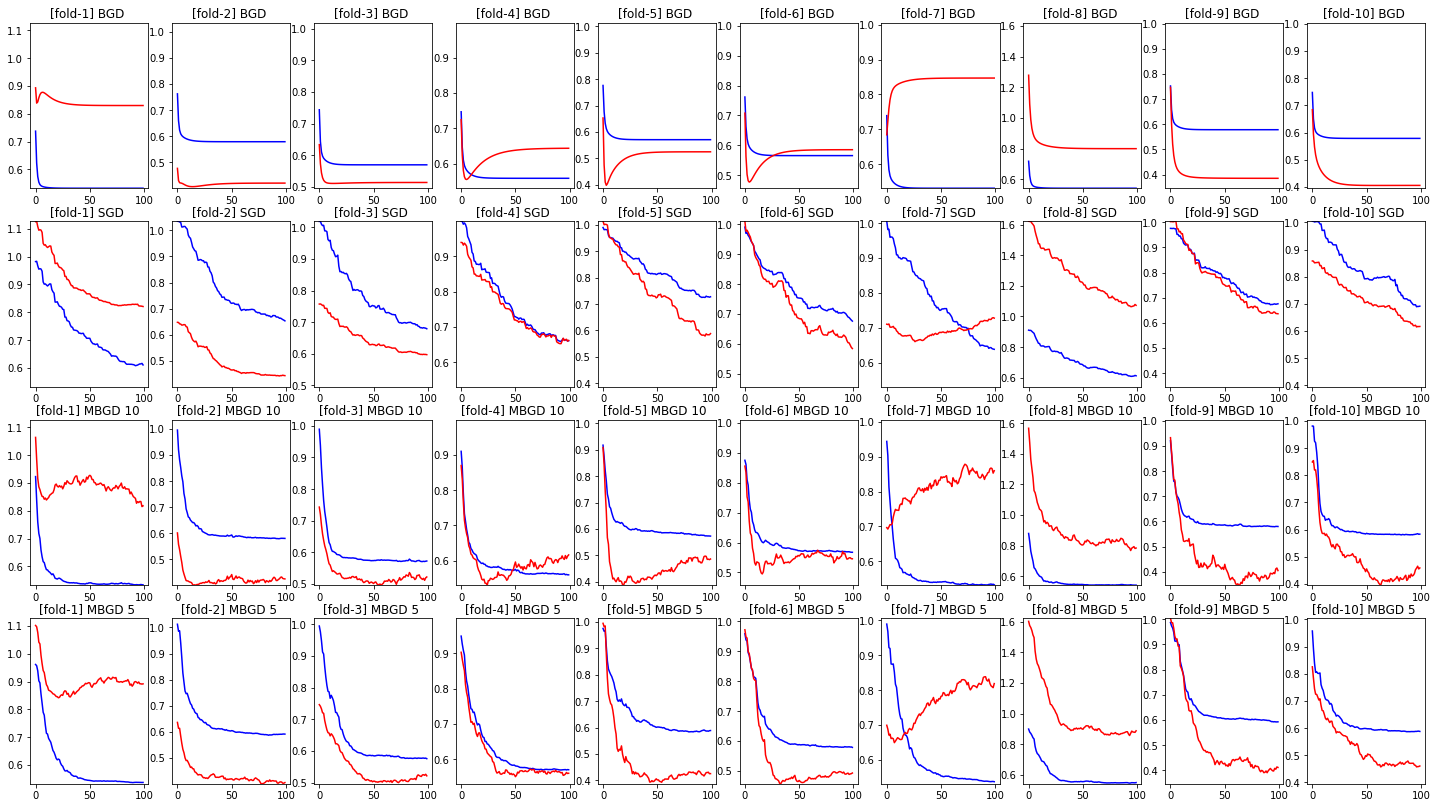

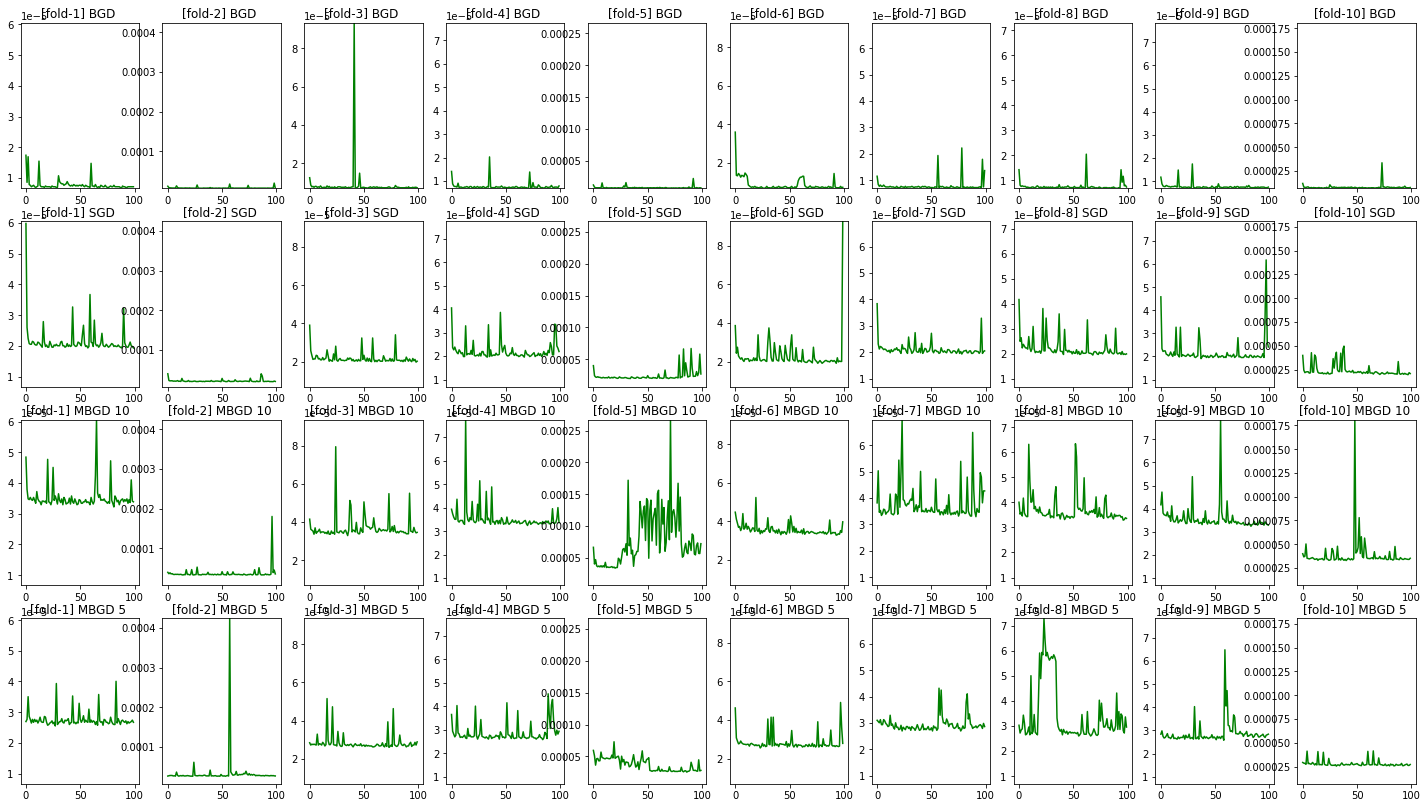



  Mean Squared Error

      Fold 9 seems to be good split since many of the least MSE is coming out from it. 

      And according to following table, fold 9 has given the least mean squared error.

      While gradient descend used to give a static MSE, mini batch gradient descent sometimes gives better value than that
      Depending on the random batches. Random batches may be helping to reduce possible overfitting happens in Gradient Descent.



In [ ]:
print(f"""
{color.BOLD}Actual dataset.  (eta=0.1, epoches=100, mini_batch_size=10, 5){color.END}

  Below visualization represents the variation of RMSE of training and test set over epoches.
  10 columns are 10 folds and the four rows are 
      1. Gradient Descent
      2. Stochastic Gradient Descent
      3. Mini Batch Gradient Descent with batch size of 10
      3. Mini Batch Gradient Descent with batch size of 5
  
  {color.UNDERLINE}Observations{color.END}
      The gradient has performed better compared to other four optimization algorithms interms of epoches. 
      Most of the time Gradient Descent has reached the optimal variables in less than ~25 epoches.

      The stochastic gradient descent algorithm has reached closer to the results from gradient descent. 
      But, Looks like it's overfitting a bit.

      The mini batch gradient has performed better when the batch size is bigger. 
      The model used to be overfitting sometimes depending on the random batch selected.
      But, it has been successfull in the optimization

      Fold 7 seems be not a fair split for all of the optimization algorithms
      The RMSE from test set has taken higher values than the training set in fold 7.

      Fold 3 and 9 seems be good splits. Less overfitting is noticed.

      Overall the execution time seems to be lower in gradient descent than other optimization algorithms. 
      But, the expectation was that it should be higher that others.
      This is because this dataset is only ~40 rows. Another example below illustrates this further.
""")

fig_rmse, fig_exec_time, fold_mse, fold_theta = show_visualizations_of_models(patient_satisfaction_data[:,[1,2,3]], patient_satisfaction_data[:,[0]])

display(fig_rmse)
display(fig_exec_time)

print(f"""

  {color.BOLD}Mean Squared Error{color.END}

      Fold 9 seems to be good split since many of the least MSE is coming out from it. 

      And according to following table, fold 9 has given the least mean squared error.

      While gradient descend used to give a static MSE, mini batch gradient descent sometimes gives better value than that
      Depending on the random batches. Random batches may be helping to reduce possible overfitting happens in Gradient Descent.
""")
fold_mse_df = pd.DataFrame(fold_mse, columns=["GD", "SGD", "MBGD 10", "MBGD 5"], index=[i for i in range(1, 11)])
fold_mse_df = fold_mse_df.style.apply(highlight_min)
display(fold_mse_df)




                                  red	 = 'RMSE - Test'
                                  blue	 = 'RMSE - Training' 
                                  blue	 = 'Execution time' 
    

Actual dataset.  (eta=0.3, epoches=100, mini_batch_size=10, 5)
  
  It's noticed that gradient discent is finding the optimal variables in less than ~20 epoches which is better than above.

  Similarly, fold 7 seems to be more overfitting.

  SGD seems to be more overfitting.

  MBGD seems to be underfitting.



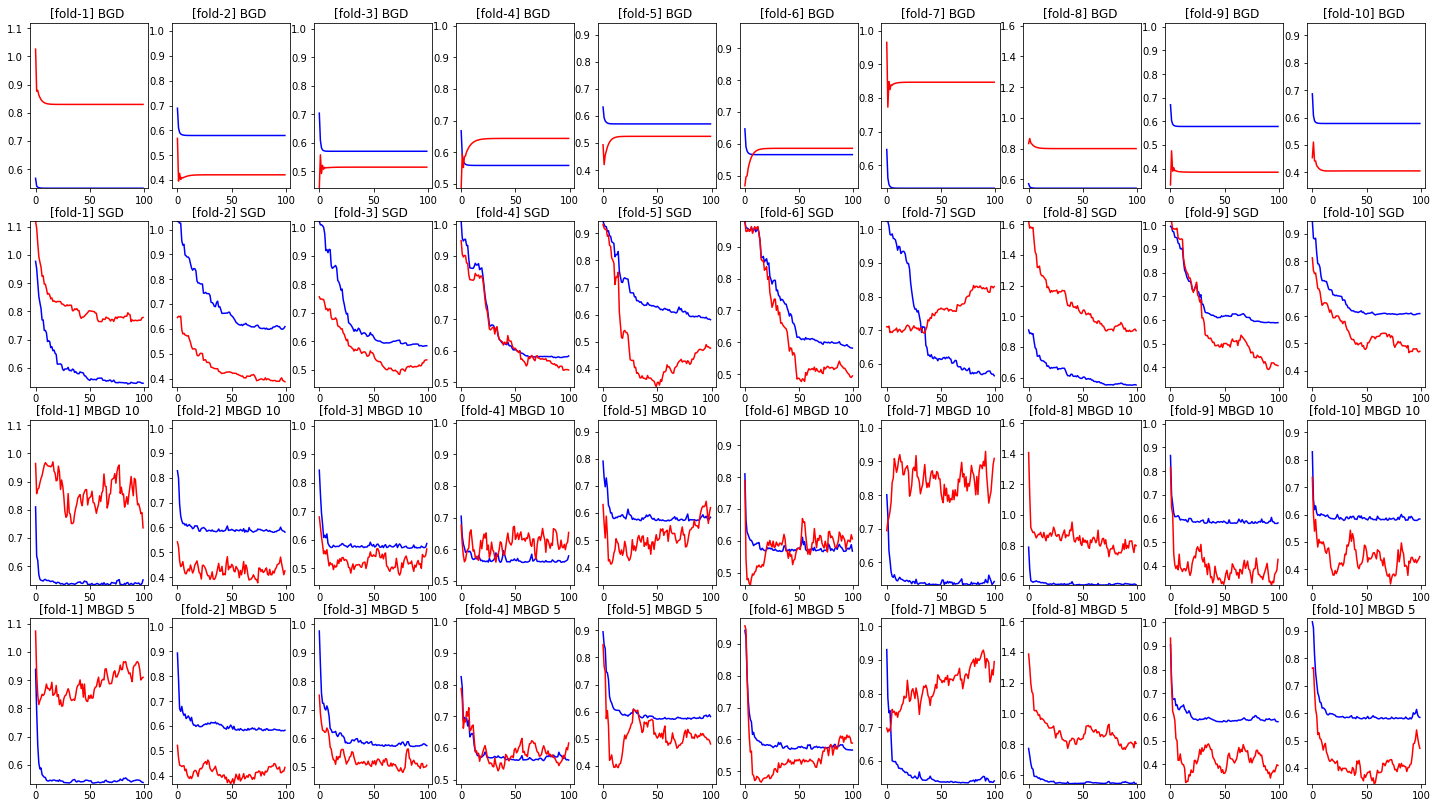


  Mean Squared Error

      Now, when the learning rate is increased to 0.3, according to the mean squared error table, looks like the 
      optimizers still work fairly.



In [ ]:
fig_rmse, fig_exec_time, fold_mse, fold_theta = show_visualizations_of_models(patient_satisfaction_data[:,[1,2,3]], patient_satisfaction_data[:,[0]], 0.3, 100, 10)

print(f"""
{color.BOLD}Actual dataset.  (eta=0.3, epoches=100, mini_batch_size=10, 5){color.END}
  
  It's noticed that gradient discent is finding the optimal variables in less than ~20 epoches which is better than above.

  Similarly, fold 7 seems to be more overfitting.

  SGD seems to be more overfitting.

  MBGD seems to be underfitting.
""")

display(fig_rmse)

print(f"""
  {color.BOLD}Mean Squared Error{color.END}

      Now, when the learning rate is increased to 0.3, according to the mean squared error table, looks like the 
      optimizers still work fairly.
""")

fold_mse_df = pd.DataFrame(fold_mse, columns=["GD", "SGD", "MBGD 10", "MBGD 5"], index=[i for i in range(1, 11)])
fold_mse_df = fold_mse_df.style.apply(highlight_min)
display(fold_mse_df)


                                  red	 = 'RMSE - Test'
                                  blue	 = 'RMSE - Training' 
                                  blue	 = 'Execution time' 
    

Actual dataset.  (eta=0.05, epoches=200, mini_batch_size=10, 5)
  
  Now, whe the learning rate is very small, the number of epoches required to to find the optimal has been increase.



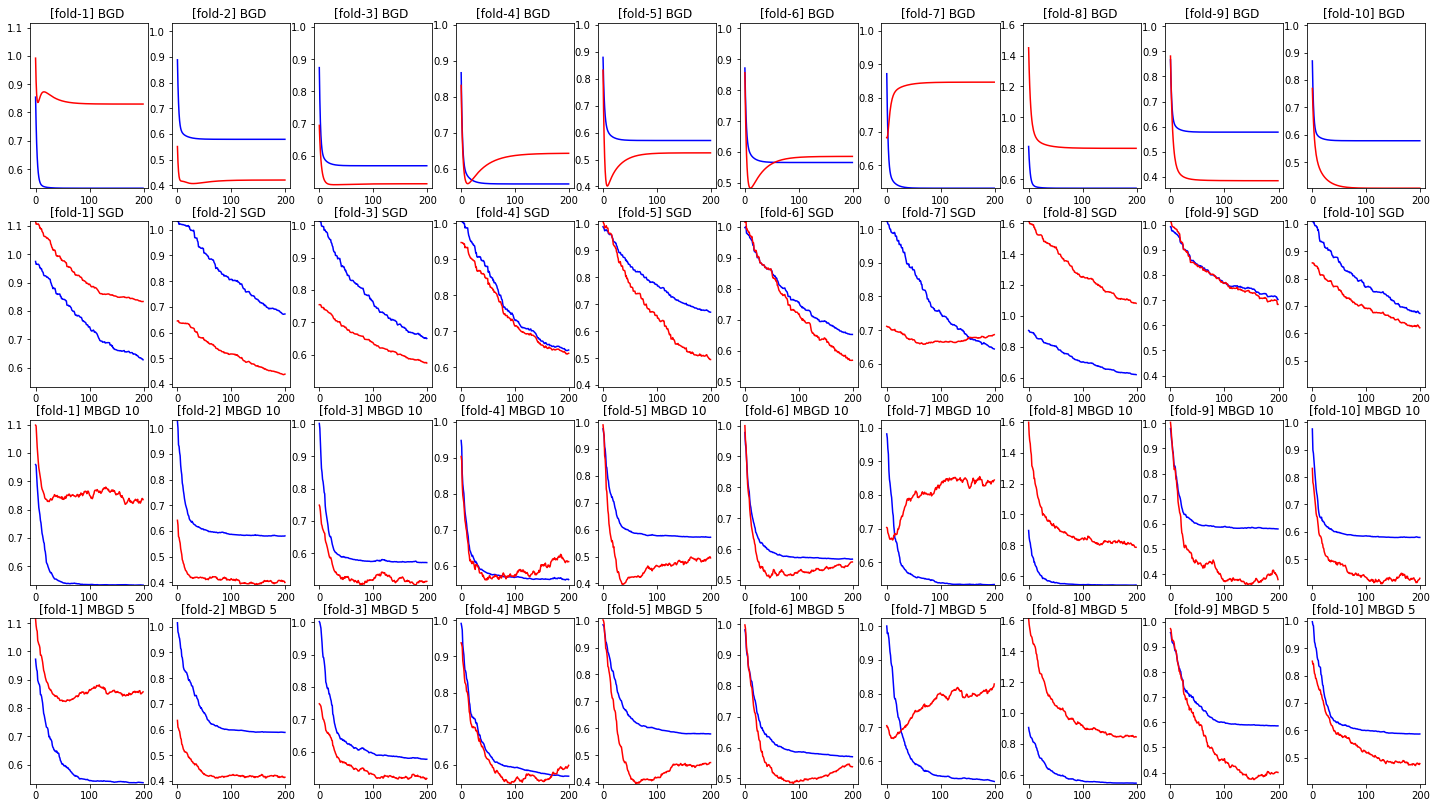


  Mean Squared Error

      Tte accuracy looks fair and no significant difference



In [ ]:
fig_rmse, fig_exec_time, fold_mse, fold_theta = show_visualizations_of_models(patient_satisfaction_data[:,[1,2,3]], patient_satisfaction_data[:,[0]], 0.05, 200, 10)

print(f"""
{color.BOLD}Actual dataset.  (eta=0.05, epoches=200, mini_batch_size=10, 5){color.END}
  
  Now, whe the learning rate is very small, the number of epoches required to to find the optimal has been increase.
""")

display(fig_rmse)

print(f"""
  {color.BOLD}Mean Squared Error{color.END}

      Tte accuracy looks fair and no significant difference
""")

fold_mse_df = pd.DataFrame(fold_mse, columns=["GD", "SGD", "MBGD 10", "MBGD 5"], index=[i for i in range(1, 11)])
fold_mse_df = fold_mse_df.style.apply(highlight_min)
display(fold_mse_df)


                                  red	 = 'RMSE - Test'
                                  blue	 = 'RMSE - Training' 
                                  blue	 = 'Execution time' 
    

Actual dataset with 100x noise entries.  (eta=0.1, epoches=500, mini_batch_size=[50, 25])
  
  Obviously the time taken for the training is higher. 

  Execution time for gradient is significantly higher than others



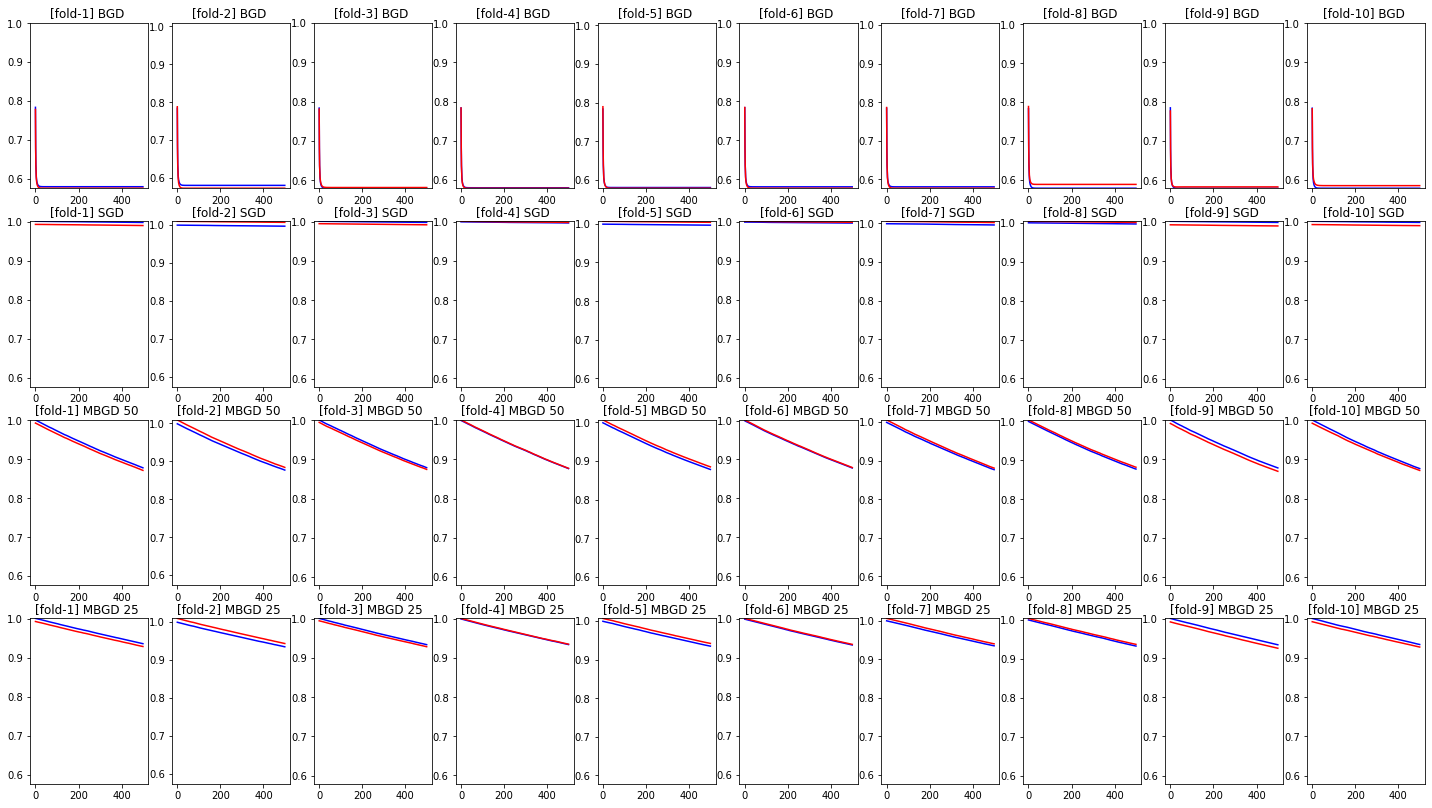

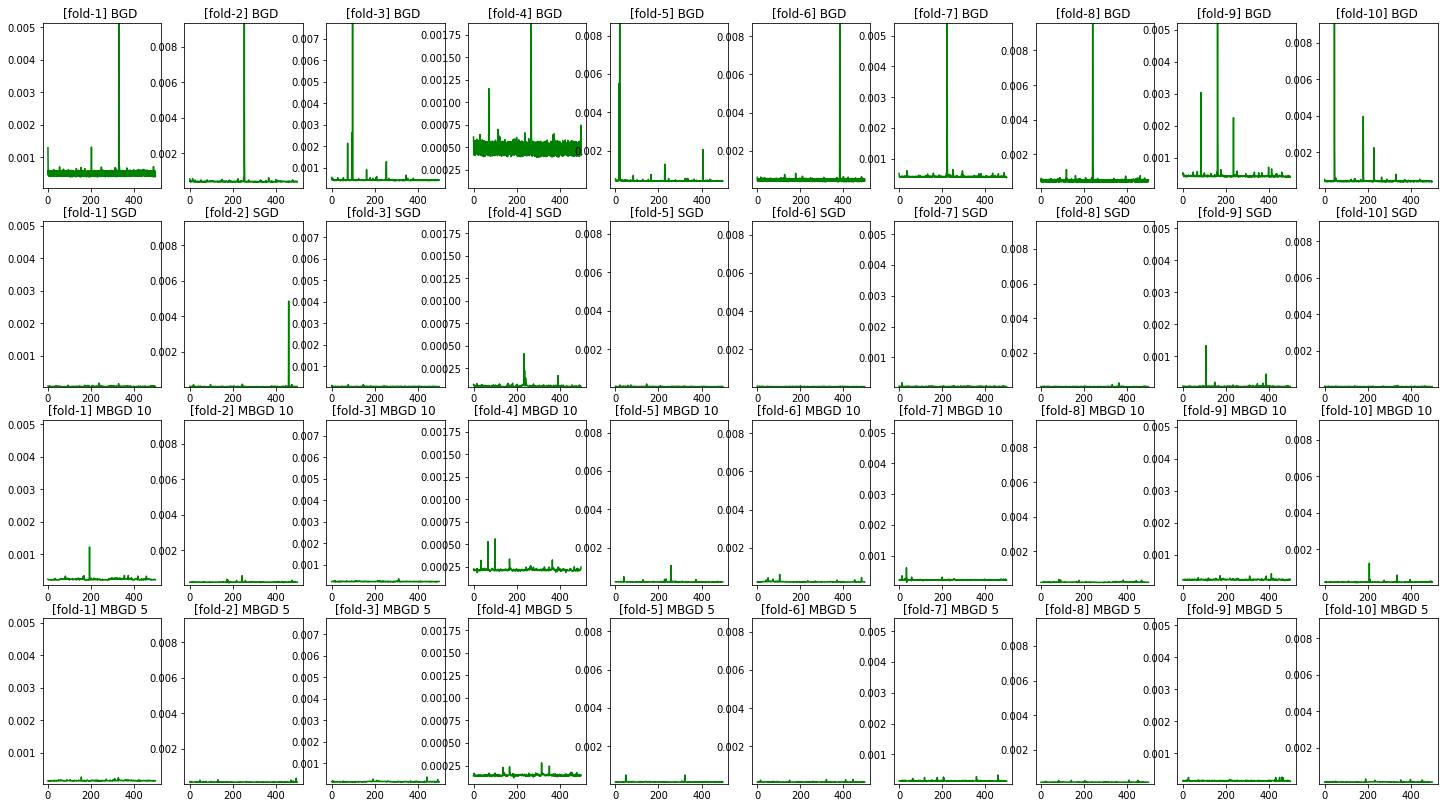


  Mean Squared Error

  While the gradient descent is giving the most optimal MSE, it looks like other optimization algorith need more epoches to 
  find the optimal.



In [ ]:
fig_rmse, fig_exec_time, fold_mse, fold_theta = show_visualizations_of_models(patient_satisfaction_data_with_duplicates_and_noise[:,[1,2,3]], patient_satisfaction_data_with_duplicates_and_noise[:,[0]], 0.1, 500, 50)

print(f"""
{color.BOLD}Actual dataset with 100x noise entries.  (eta=0.1, epoches=500, mini_batch_size=[50, 25]){color.END}
  
  Obviously the time taken for the training is higher. 

  Execution time for gradient is significantly higher than others
""")

display(fig_rmse)
display(fig_exec_time)

print(f"""
  {color.BOLD}Mean Squared Error{color.END}

  While the gradient descent is giving the most optimal MSE, it looks like other optimization algorith need more epoches to 
  find the optimal.
""")

fold_mse_df = pd.DataFrame(fold_mse, columns=["GD", "SGD", "MBGD 10", "MBGD 5"], index=[i for i in range(1, 11)])
fold_mse_df = fold_mse_df.style.apply(highlight_min)
display(fold_mse_df)


In [ ]:
fig_rmse, fig_exec_time, fold_mse, fold_theta = show_visualizations_of_models(patient_satisfaction_data[:,[1,2,3]], patient_satisfaction_data[:,[0]], legends=False)

gd_optimal_coef = fold_theta[np.argmin(fold_mse[:, 0])][0]
sgd_optimal_coef = fold_theta[np.argmin(fold_mse[:, 1])][1]
mbgd_optimal_coef = fold_theta[np.argmin(fold_mse[:, 2])][2]
mbgd_5_optimal_coef = fold_theta[np.argmin(fold_mse[:, 3])][3]

print(f"""

{color.BOLD}Optima Hyper Parameters{color.END}
  Gradient Descent 
      epoches         : 25
      learning rate   : 0.1
  Stochastic Gradient Descent  
      epoches         : 100
      learning rate   : 0.1
  Mini Batch Gradient Descent  
      epoches         : 100
      learning rate   : 0.1
      mini batch size : 10

{color.BOLD}Optima Regression Coefficients{color.END}
  Gradient Descent  \t\t:  \t{gd_optimal_coef[0]} \t{gd_optimal_coef[0]} \t{gd_optimal_coef[0]} \t{gd_optimal_coef[0]} 
  Stochastic Gradient Descent  \t:  \t{sgd_optimal_coef[0]} \t{sgd_optimal_coef[0]} \t{sgd_optimal_coef[0]} \t{sgd_optimal_coef[0]} 
  Mini Batch Gradient Descent  \t:  \t{mbgd_optimal_coef[0]} \t{mbgd_optimal_coef[0]} \t{mbgd_optimal_coef[0]} \t{mbgd_optimal_coef[0]} 
""")

print(f"""
{color.BOLD}Mean Squared Error{color.END}
""")

fold_mse_df = pd.DataFrame(fold_mse, columns=["GD", "SGD", "MBGD 10", "MBGD 5"], index=[i for i in range(1, 11)])
fold_mse_df = fold_mse_df.style.apply(highlight_min)
display(fold_mse_df)



Optima Hyper Parameters
  Gradient Descent 
      epoches         : 25
      learning rate   : 0.1
  Stochastic Gradient Descent  
      epoches         : 100
      learning rate   : 0.1
  Mini Batch Gradient Descent  
      epoches         : 100
      learning rate   : 0.1
      mini batch size : 10

Optima Regression Coefficients
  Gradient Descent  		:  	[0.02374157] 	[0.02374157] 	[0.02374157] 	[0.02374157] 
  Stochastic Gradient Descent  	:  	[-0.02253685] 	[-0.02253685] 	[-0.02253685] 	[-0.02253685] 
  Mini Batch Gradient Descent  	:  	[0.046395] 	[0.046395] 	[0.046395] 	[0.046395] 


Mean Squared Error



**How were the optimal values selected?**

By trying difference values. For an example, learning rate (0.1, 0.3, 0.5, 0.05). THe number of epoches is dependent on the size of the dataset. More the data higher the number of epoches required. For mini batch gradient decent, higher the batch size, better the optimization and higher the execution time as well. So, It's all about experimenting different values to find the optimal.

**Which algorithm performed better and why?**

Gradient descent is better as in the accuracy given it takes higher execution time if the dataset is large. Stochastic gradient descent is to be more overfitting because the theta is updated only by one sample. Mini batch gradient descent is giving better results interms of both execution time and accuracy given the right batch size is needed to be found out through trial and error. 